# DECISION TREE


In [358]:
import pandas as pd
tit = pd.read_csv('titanic.csv')
tit

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:>

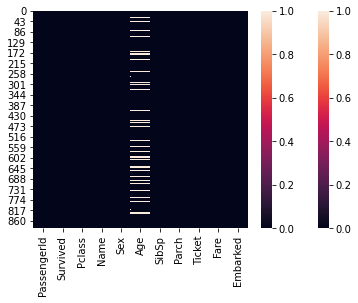

In [359]:
import seaborn as sb
sb.heatmap(tit.isnull())

tit.drop('Cabin' , axis = 1 , inplace = True)
sb.heatmap(tit.isnull())

<AxesSubplot:>

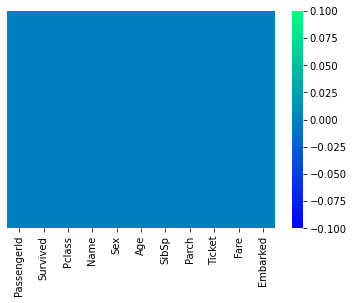

In [360]:
import seaborn as sns
tit.dropna(inplace = True)
sns.heatmap(tit.isnull() , yticklabels=False , cmap='winter' )


In [361]:
tit.shape

(712, 11)

## LABEL ENCODING

In [362]:
from sklearn.preprocessing import LabelEncoder

sex_new = LabelEncoder()
parch_new= LabelEncoder()
pclass_new = LabelEncoder()
embark_new = LabelEncoder()

tit.Sex = sex_new.fit_transform(tit.Sex)
tit.Parch = parch_new.fit_transform(tit.Parch)
tit.Pclass = pclass_new.fit_transform(tit.Pclass)
tit.Embarked = embark_new.fit_transform(tit.Embarked)


In [363]:
tit

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,2,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,2,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,2,"Rice, Mrs. William (Margaret Norton)",0,39.0,0,5,382652,29.1250,1
886,887,0,1,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,2
887,888,1,0,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,2
889,890,1,0,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,0


In [401]:
# separating independant and depandant variables

x= tit.drop(['PassengerId' , 'Name' ,'Ticket' ,  'Survived'] , axis = 1  )
y = tit['Survived']
x



,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,22.0,1,0,7.2500,2
1,0,0,38.0,1,0,71.2833,0
2,2,0,26.0,0,0,7.9250,2
3,0,0,35.0,1,0,53.1000,2
4,2,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
885,2,0,39.0,0,5,29.1250,1
886,1,1,27.0,0,0,13.0000,2
887,0,0,19.0,0,0,30.0000,2
889,0,1,26.0,0,0,30.0000,0


to validate our model we will perform an unseen data..we need to create the validation set...now to create this validation set we
will use the train_test_split function of sklearns model selection

In [365]:
# importing train_test_split to create validation set
from sklearn.model_selection import train_test_split
x_train , x_valid , y_train , y_valid = train_test_split (x , y , test_size = 0.3  , random_state = 47)

# x_train has 70 and validation set has 25 % of data


In [366]:
# distribution in training set
y_train.value_counts(normalize = True)


# .value_counts returns the count of all classes and normalize = true will retuern the percentage 

0    0.590361
1    0.409639
Name: Survived, dtype: float64

In [367]:
# distribution in validation set
y_valid.value_counts(normalize = True)


# .value_counts returns the count of all classes and normalize = true will retuern the percentage 

0    0.607477
1    0.392523
Name: Survived, dtype: float64

In [368]:
x_train.head() , x_train.shape

(     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
 747       1    0  30.0      0      0  13.0000         2
 791       1    1  16.0      0      0  26.0000         2
 808       1    1  39.0      0      0  13.0000         2
 817       1    1  31.0      1      1  37.0042         0
 263       0    1  40.0      0      0   0.0000         2,
 (498, 7))

In [369]:
y_train.head() , y_train.shape

(747    1
 791    0
 808    0
 817    0
 263    0
 Name: Survived, dtype: int64,
 (498,))

In [370]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=10)

model.fit(x_train , y_train)

DecisionTreeClassifier(random_state=10)

# checking the training set



In [371]:
model.score(x_train , y_train)

0.9899598393574297

# checking the validation set

In [372]:
model.score(x_valid, y_valid)

# 0.9899598393574297 and 0.7757009345794392  training and testing accuracy is not synk one is romba higher than other
# we have solve this prblm after the optimization

0.7757009345794392

In [373]:
y_pred = model.predict(x_valid)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [374]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid , y_pred)

# here we make the predictions for all the observations in the validation set.

0.7757009345794392

In [375]:
# apart from predicting the clss we can also probability of both classes ie 0 and 1...using the predict_proba(x_valid)

yprediction = model.predict_proba(x_valid)
yprediction
# in op we can see 2 columns over there the 1st column shows the  PROBABILITY OF CLASS '0'...
# the second column shows the PROBABILITY OF CLASS '1'..

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.

In [376]:
## we can also use different thresholds to decide the class of observation ...when we use predict_probab function it takes the 
# middile value as threshold ans we can assume thaat below the threshold value should be 0 ..and above the threshold value should be 1
# this is not neccerary but doing this maay increase or decrease the accracy value

In [377]:
# new_y = []
# for i in range(len(yprediction)) :
#     if yprediction[i] < 0.6  :
#         new_y.append(0)
#     else:
#         new_y.append(1)

# 1. CHANGIING THE MAX_DEPTH parameter

In [378]:
train_accuracy = []
validation_accuracy = []
for depth in range (1,10) :
    dt_model = DecisionTreeClassifier(max_depth = depth  , random_state = 10)
    dt_model.fit(x_train , y_train )
    train_accuracy.append(dt_model.score(x_train, y_train))
    validation_accuracy.append(dt_model.score(x_valid , y_valid))

## important

In [379]:
# now lets create the dataframe from the values which we got in the prevous cell ....
# in op we can see that training and validation accuracies corresponding to the set of range of max_depth 
# lets plot this values.....lets plot this value p

In [380]:
frame = pd.DataFrame({'max_depth' : range (1,10)  , 'traningaccuracy' : train_accuracy  , 'validationaccuracy' : validation_accuracy})
frame

,max_depth,traningaccuracy,validationaccuracy
0,1,0.779116,0.780374
1,2,0.809237,0.785047
2,3,0.831325,0.808411
3,4,0.835341,0.813084
4,5,0.847390,0.817757
5,6,0.867470,0.803738
6,7,0.883534,0.808411
7,8,0.899598,0.794393
8,9,0.903614,0.775701


In [381]:
frame.columns

Index(['max_depth', 'traningaccuracy', 'validationaccuracy'], dtype='object')

# optimization of decision tree using max depth parameter.. use any of the parameter also that we have studied ..notes in diary

No handles with labels found to put in legend.


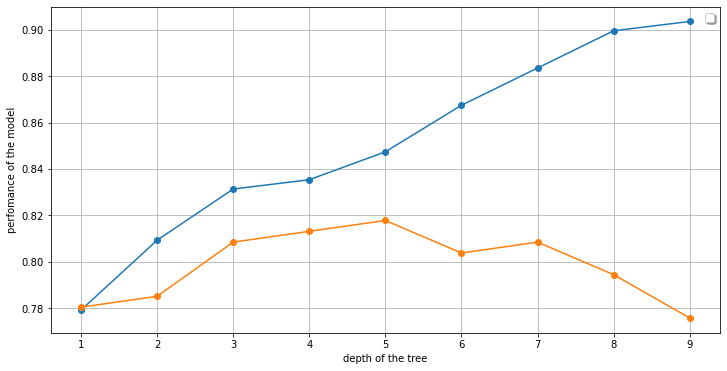

In [382]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'] , frame['traningaccuracy'] ,marker = 'o' )
plt.plot(frame['max_depth'] , frame['validationaccuracy'] ,marker = 'o')

plt.xlabel('depth of the tree')
plt.ylabel('perfomance of the model')
plt.legend(shadow = True,fontsize = 'large')


plt.grid()
plt.show()

In [383]:
dt_model = DecisionTreeClassifier(max_depth= 8 , criterion='gini' , max_leaf_nodes= 25 , random_state = 10)
dt_model

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25, random_state=10)

In [384]:
# training sore
dt_model.fit(x_train , y_train)
dt_model.score(x_train , y_train)

0.8694779116465864

In [1]:
# validation score
dt_model.score(x_valid , y_valid)



NameError: name 'dt_model' is not defined

# VISUALIZING DECISION TREE  /\

In [417]:
decision_tree = tree.export_graphviz(dt_model , out_file = 'tree.dot' , feature_names = x_train.columns , max_depth = 3 , filled = True)


In [418]:
!dot -Tpng tree.dot -o tree.png


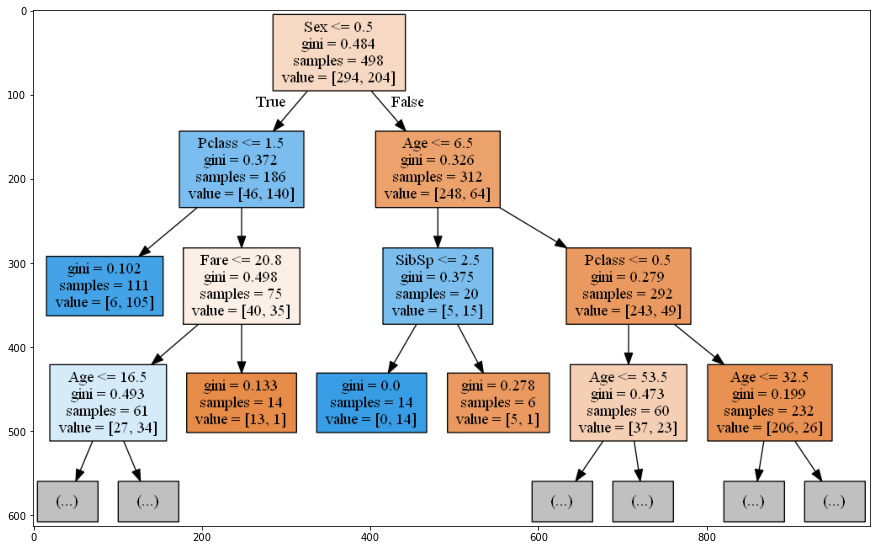

In [419]:
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)



# predicting new value

In [400]:
dt_model.predict([[4,3,35,0,0,8.0,5]])

array([0], dtype=int64)